<a href="https://colab.research.google.com/github/Badu1230/Badu1230/blob/main/Titanic_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Style plus esthétique
sns.set_style("whitegrid")
sns.set_palette("pastel")


In [2]:
df = sns.load_dataset("titanic")
df.dropna(subset=['age'],inplace=True) #Suppression des valeurs NaN pour éviter les problèmes d'affichage

In [3]:
display(df)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


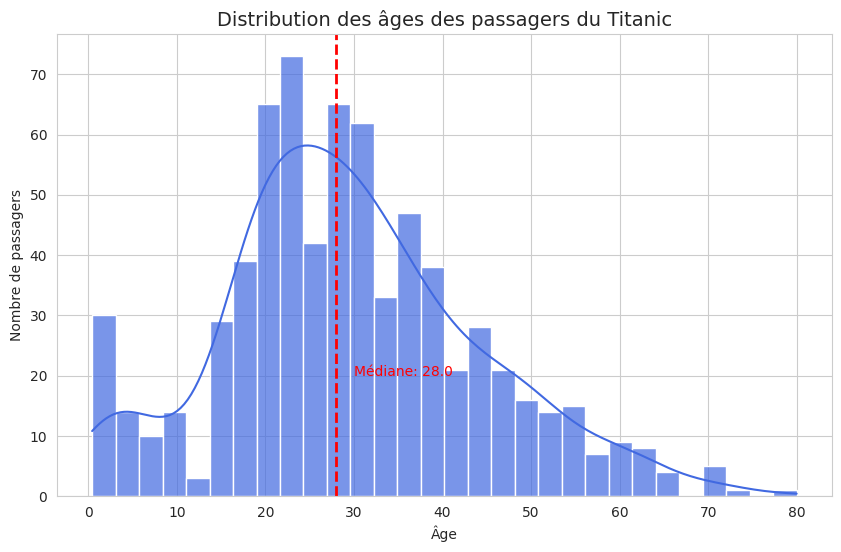

In [4]:
# Afficher la distribuition des âges avec une courbe de densité
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True,
             color="royalblue", alpha=0.7)
# Ajout d’annotations
plt.axvline(df['age'].median(), color='red',
            linestyle='dashed', linewidth=2)
plt.text(df['age'].median() + 2, 20, f"Médiane: {df['age'].median():.1f}", color="red")
plt.title("Distribution des âges des passagers du Titanic", fontsize=14)
plt.xlabel("Âge")
plt.ylabel("Nombre de passagers")
plt.show()

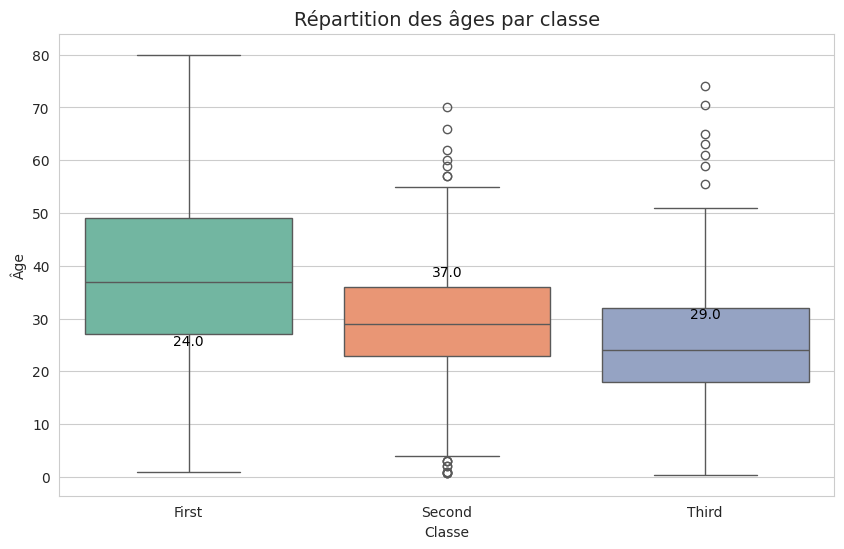

In [12]:
#Afficher la répartition des âges par classe : Boxplot avec catégories et annotations
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='age', hue='class', data=df, palette="Set2", legend=False) # Assigning 'class' to 'hue'
# Ajout de la médiane sous forme d’annotation
for i, class_label in enumerate(df['class'].unique()):
        median_age = df[df['class'] == class_label]['age'].median()
        plt.text(i, median_age + 1, f"{median_age:.1f}", ha="center", color="black")
        plt.title("Répartition des âges par classe", fontsize=14)
plt.xlabel("Classe")
plt.ylabel("Âge")
plt.show()

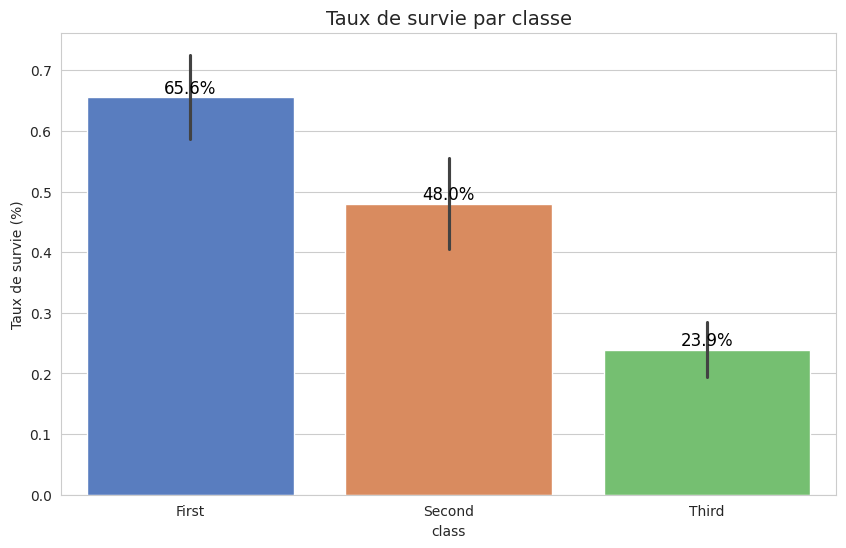

In [13]:
#Comparer le taux de survie par classe - Barplot avec annotations de pourcentage
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='class', y='survived', hue='class', data=df, palette="muted", legend=False)
# Ajout des pourcentages sur les barres
for p in ax.patches:
  ax.annotate(f"{p.get_height()*100:.1f}%",
              (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='bottom', fontsize=12, color="black")
plt.title("Taux de survie par classe", fontsize=14)
plt.ylabel("Taux de survie (%)")
plt.show()

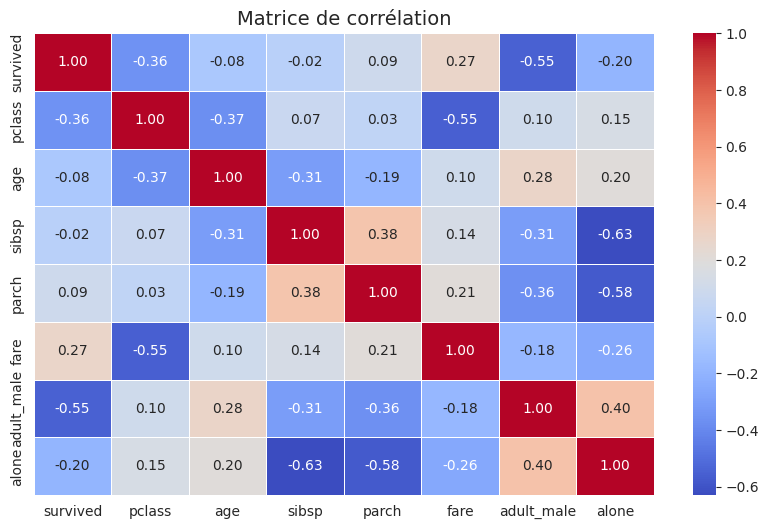

In [14]:
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation", fontsize=14)
plt.show()

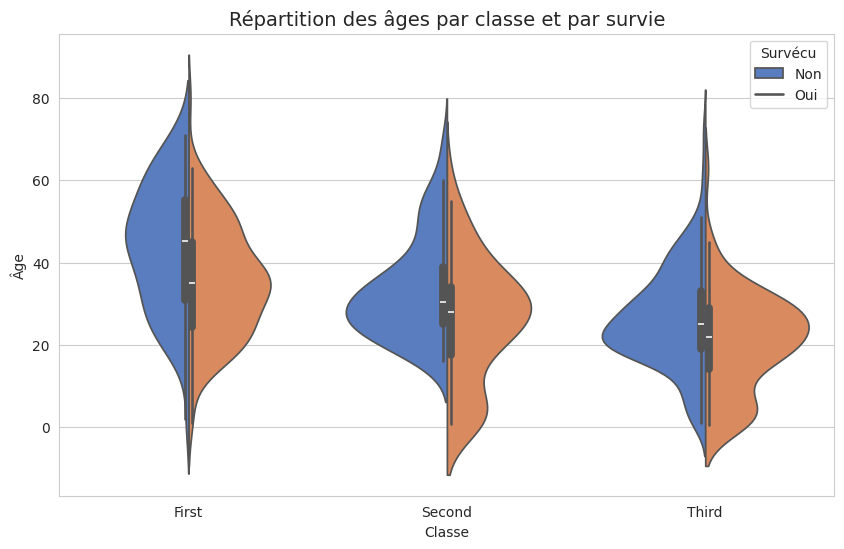

In [15]:
#Visualiser la distribution de l’âge pour chaque classe et survivant/non-survivant.
# L’option split=True permet de comparer les survivants vs non-survivants en divisant les violons.
plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='age', hue='survived', data=df, split=True, palette="muted")
plt.title("Répartition des âges par classe et par survie", fontsize=14)
plt.xlabel("Classe")
plt.ylabel("Âge")
plt.legend(title="Survécu", labels=["Non", "Oui"])
plt.show()